In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.holtwinters import Holt
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('final_daily.csv')
df['date']=pd.to_datetime(df['date'])
df=df[df['date']<datetime.datetime(2023,1,1)]

In [ ]:
df1=df[['date','price']]
df2=df[['date','demand']]

In [ ]:
price_train=df1[df1['date']<datetime.datetime(2022,1,1)]
price_test=df1[df1['date']>=datetime.datetime(2022,1,1)]
demand_train=df2[df2['date']<datetime.datetime(2022,1,1)]
demand_test=df2[df2['date']>=datetime.datetime(2022,1,1)]

In [ ]:
price_train2 = price_train.drop(['date'], axis = 1)

In [ ]:
fc = pd.DataFrame()

for i in range(-365, 0):
    # model = ETSModel(df['price'].iloc[:len(df) + i])
    model = ETSModel(df['demand'].iloc[:len(df) + i])
    res = model.fit()
    forecast = res.forecast(steps=1)
    fc = pd.concat([fc, forecast])

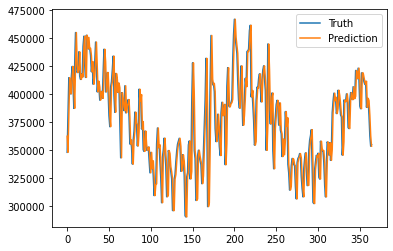

In [ ]:
# plt.plot(price_test['price'].reset_index(drop=True), label='Truth')
plt.plot(demand_test['demand'].reset_index(drop=True), label='Truth')
plt.plot(fc.values[:, 0], label='Prediction')
plt.legend()

In [ ]:
# np.square(fc.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()
np.square(fc.values.reshape(-1, 1) - demand_test['demand'].values.reshape(-1, 1)).mean()

414561050.3030995

In [ ]:
# np.abs(fc.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()
np.abs(fc.values.reshape(-1, 1) - demand_test['demand'].values.reshape(-1, 1)).mean()

15270.602125818346

In [ ]:
def mape(x, y):
  error = abs(x-y)/abs(x)
  error[error > 1] = 1
  return np.mean(error)

# mape(fc.values.reshape(-1, 1),  price_test['price'].values.reshape(-1, 1))
mape(fc.values.reshape(-1, 1),  demand_test['demand'].values.reshape(-1, 1))

0.04100255746016182

# Another one

In [ ]:
fc2 = pd.DataFrame()

for i in range(-365, 0):
    model = sm.tsa.statespace.ExponentialSmoothing(df['price'].iloc[:len(df) + i],
                                           trend=True, 
                                           initialization_method= 'heuristic',
                                           seasonal=4, 
                                           damped_trend=True)
    res = model.fit()
    forecast = res.forecast(steps=1)
    fc2 = pd.concat([fc2, forecast])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/exponential_smoothing.py:356: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-unconstrained[i])) * (high - low) + low)


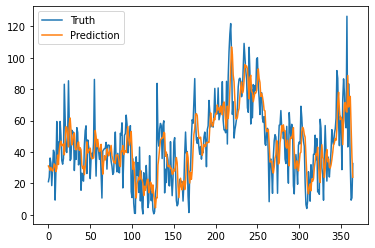

In [ ]:
plt.plot(price_test['price'].reset_index(drop=True), label='Truth')
plt.plot(fc2.values[:, 0], label='Prediction')
plt.legend()

In [ ]:
np.square(fc2.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()

289.645337019872

In [ ]:
np.abs(fc2.values.reshape(-1, 1) - price_test['price'].values.reshape(-1, 1)).mean()

13.046974372427123

In [ ]:
def mape(x, y):
  error = abs(x-y)/abs(x)
  error[error > 1] = 1
  return np.mean(error)

mape(fc2.values.reshape(-1, 1),  price_test['price'].values.reshape(-1, 1))

0.3300552660353473

# External regressor

In [ ]:
fc3 = pd.DataFrame()

for i in range(-365, 0):
    model = ETSModel(df['price'].iloc[:len(df) + i])
    res = model.fit()
    forecast = res.forecast(steps=1)
    fc3 = pd.concat([fc, forecast])